In [69]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import time

In [70]:
# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 10

In [71]:
# Step 1: Read in data
# using TF Learn's built in function to load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets('../data/mnist', one_hot=True) 

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


label: [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


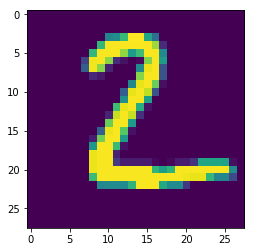

In [72]:
import matplotlib.pyplot as plt;  
# print('data:', mnist.test.images[1])
example = mnist.test.images[1]
example = example.reshape((28, 28))

plt.figure(1)
plt.imshow(example)  

print('label:',mnist.test.labels[1])

In [74]:


# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 

X = tf.placeholder(tf.float32, [batch_size, 784], name="image")
Y = tf.placeholder(tf.float32, [batch_size, 10], name="label")

# Step 3: create weights and bias
# weights and biases are initialized to 0
# shape of w depends on the dimension of X and Y so that Y = X * w + b
# shape of b depends on Y
# tf.Variable(initial_value=None, trainable=True, collections=None,
# name=None, dtype=None, ...)

# X [1,128] -> Y [1,128]

#  n * 50  50 x 128 


W = tf.Variable(tf.random_uniform([784, 10]))

b = tf.Variable(tf.zeros([batch_size, 10]))

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
# to get the probability distribution of possible label of the image
# DO NOT DO SOFTMAX HERE
# n * 784 * 784 * 10 = n * 10 

logits = tf.matmul(X, W) + b

# Step 5: define loss function
# use cross entropy loss of the real labels with the softmax of logits
# use the method:
# tf.nn.softmax_cross_entropy_with_logits(logits, Y)
# then use tf.reduce_mean to get the mean loss of the batch

entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)

# computes the mean over all the examples in the batch
loss = tf.reduce_mean(entropy)

# Step 6: define training op
# using gradient descent to minimize loss
# optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(loss);
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss);

with tf.Session() as sess:
    start_time = time.time()
    sess.run(tf.global_variables_initializer())	
    n_batches = int(mnist.train.num_examples/batch_size)
    for i in range(n_epochs): # train the model n_epochs times
        total_loss = 0

        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            # TO-DO: run optimizer + fetch loss_batch
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X:X_batch, Y:Y_batch})
            # 
            total_loss += loss_batch
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))
    
    print(sess.run([W, b]))
    print('Total time: {0} seconds'.format(time.time() - start_time))

    print('Optimization Finished!') # should be around 0.35 after 25 epochs

    # test the model
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
        preds = tf.nn.softmax(logits_batch)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
        accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # need numpy.count_nonzero(boolarr) :(
        total_correct_preds += sess.run(accuracy)

    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

Average loss epoch 0: 4.550158170553354
Average loss epoch 1: 3.6667636257785183
Average loss epoch 2: 3.0991071504312795
Average loss epoch 3: 2.6860673577635437
Average loss epoch 4: 2.373814095150341
Average loss epoch 5: 2.1233131340889386
Average loss epoch 6: 1.925914789691116
Average loss epoch 7: 1.7659459083508222
Average loss epoch 8: 1.6326005122600458
Average loss epoch 9: 1.5220286837824575
[array([[ 0.72320378,  0.66868746,  0.71579754, ...,  0.58345783,
         0.99333251,  0.20400238],
       [ 0.58385193,  0.17200685,  0.0968678 , ...,  0.38021982,
         0.13356638,  0.99035096],
       [ 0.01107883,  0.3220979 ,  0.21486855, ...,  0.70850003,
         0.48984551,  0.63822699],
       ..., 
       [ 0.22534215,  0.40851331,  0.33976674, ...,  0.82307041,
         0.78682375,  0.10214317],
       [ 0.05903006,  0.82807446,  0.29510295, ...,  0.99949396,
         0.98835528,  0.29688847],
       [ 0.12194014,  0.1880151 ,  0.1579119 , ...,  0.20436609,
         0.386

## 不同优化方法的准确率
* GradientDescentOptimizer:0.8429
* AdadeltaOptimizer:0.7062
* AdagradOptimizer:0.851
* AdamOptimizer:0.924
* FtrlOptimizer:0.8507
* RMSPropOptimizer:0.9249

## RMSPropOptimizer 不同学习率优化结果
* 0.001: 0.9241
* 0.005: 0.9258
* 0.01:  0.9249


## RMSPropOptimizer 不同迭代次数的结果
learning_rate = 0.01

* 10次：0.9241
* 30次：0.9255
* 100次：0.926